# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

- Currently, the Smartcab does not move. It appears to be initialized in a random state (intersection in this environment), and run for about 120 steps. The Smartcab remains stationary for all steps in a given trial.

- The Smartcab can receive positive or negative rewards depending on the action taken in the intersection. The size of the rewards do not have equal magnitude. It appears that different situations impact not only the type of reward (positive or negative), but the magnitude of it as well.

- If the Smartcab idles at a red light, it receives a positive reward, however if it does the same at a green light, it receives a negative reward. I can conclude that this encourages the cab to not take an action at a red light, and penalizes it for not taking one at a green light. There is a special situation where the the cab idles a green light with oncoming traffic and receives a small positive reward. I speculate that this is necessary in the event that the cab needs to turn left but faces oncoming traffic moving forward or right. In those cases, turning left would cause an accident, so idling deserves a positive reward.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

- The ```grid_size``` keyword argument in the ```environment.py``` module determines the layout of the city grid, which is basically a matrix of intersections - 8 wide X 6 long by default. This tuple can be manipulated to change the size of the environment in which the Smartcab has to operate. The ```learning``` keyword argument in the ```agent.py``` module instructs the agent whether or not use Q-Learning as it attempts to move around the city grid. This value is set to ```False``` by default, which causes the agent not to remember any information about its environment as it transitions from state to state. The ```n_test``` keyword argument in ```simulator.py``` issues the amount of test trials that the Smartcab must undertake, from which it's safety and reliability in the environment can be assessed. These trials are executed following the training period.


- The ```Environment.act()``` function is called when the agent is called to consider and execute an action.


- ```render_text()``` displays the output for each step in successive trials as text in the Terminal. There is no visualization component for this function. With this function, output history is logged and can be easily viewed in the Terminal even after the program has taken new steps. This makes it easier to observe how rewards for different actions change as a function of time. ```render()``` on the other hand takes the same parameters as ```render_text()``` and computes trial outputs in the same way, yet displays its output in the Pygame GUI. This output not only includes text, but also a graphical depiction of the virtual environment in which the Smartcab operates. This function allows the user to more easily visualize how different actions cause the agent to transition into new states, however it only displays state / action / reward triples for the current step, so one cannot observe the history of steps using this interface.


- The ```next_waypoint()``` function considers the East-West direction before considering North-South when determing how to reach the destination.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


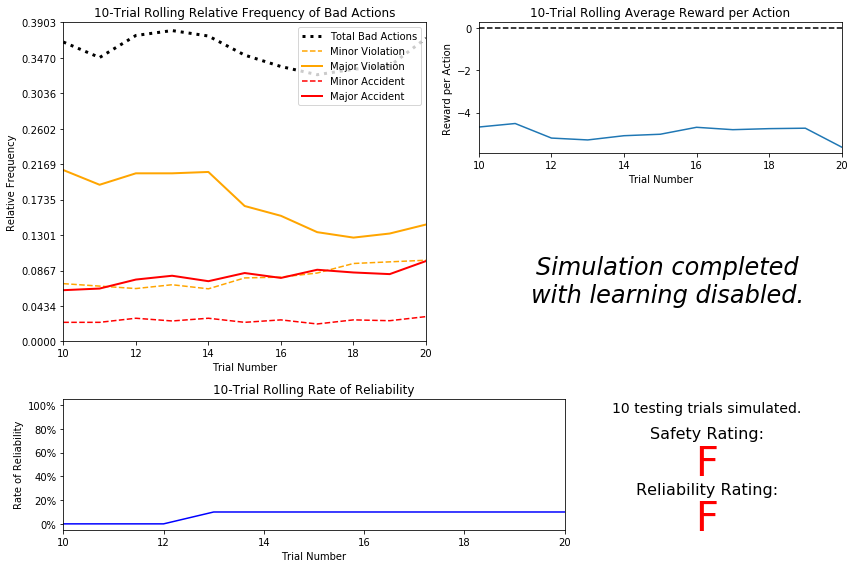

In [17]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

- The driving agent is clearly not performing well with random actions, as indicated by its F rating in safety and F rating in reliability. The driving agent made poor decisions 35 to 40% of the time in a given trial. Around 10% of its decisions resulted in accidents, the majority of which were deemed "major accidents." This sort of unpredictability ensures that it would not last long on a real road.



- The 10-Trial rolling reliability rating peaked and then flatlined at 10% from trial 13 to 20. What this indicates is that the driving agent was able to occasionally reach its destination through random chance. This occurred during this simulation once on trial 13. In any case, its reliability is a function of nothing more than chance, so for all and intents and purposes, it is not reliable at all.



- On the aggregate, the Smartcab is earning negative rewards, demonstrated by its 10-Trial Rolling Average Reward per Action that is consistently in the red. Even with random chance, the majority of the cab's decisions are good, however its net reward is consistently negative because bad decisions have heavier weight than good decisions. In one instance, the cab properly idled at a red light and earned a reward of 2.16 and then caused a major accident by running a red light a few steps later, which earned it -39.56. With this weighting scheme, rewards from its random good decisions can never overcome those from its bad ones.



- There doesn't appear to be a correlation between the number of trials and the behavior of the cab. By most metrics, it is just as bad or even worse at the end of the 20 training trials as when it started. All in all, a Smartcab with this configuration cannot be considered safe or reliable for passengers. More training will not help as it fundamentally cannot learn and therefore improve its behavior from trial to trial.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

 - `inputs`, including `light`, `left`, `right`, and `oncoming` are most relevant for the Smartcab in learning how to drive **safely**, because these features provide information about the immediate environment. Having said that, the cab only requires information about `light`, `oncoming`, and `left` in order to make safe decisions. This is because there is no situation in which a car at a light needs to be aware of the intended behavior of traffic to the right of it in order to make a sound decision. If `light` is red, then it must learn to choose `None` as an action, regardless of all other state information. In cases involving a green light, the cab must learn to choose the action directed by the `waypoint` in that state. Assuming that all dummy agents to the `left` and `right` perfectly obey traffic laws, then the Smartcab can safely ignore their intentions at green lights. This is because when the cab faces a green light, traffic on the `left` and `right` necessarily face red lights and under no circumstance have right-of-way. There is a specific green light case in which the cab should choose `forward` or `right` if `oncoming` is `forward` or `right` and `waypoint` directs the cab `left`, because `oncoming` has right-of-way in this situation. Therefore `oncoming` is a relevant feature if the cab is to avoid an accident when considering whether or not to turn left at a green light. Furthermore, there is a specific red light case in which the cab should choose `None` if `left` is `forward`, and the `waypoint` directs the cab `right`, because `left` in this situation has the right-of-way.
 
 
- Using all of this this information, the cab can make decisions such as when to move and when to stop. These decisions have immediate consequence in the form of positive and negative rewards that the cab can associate with state-action pairs that it has experienced as it trains in the environment.


- Even if the cab manages to drive safely though, it cannot reach its destination **efficently** if it doesn't take into account `waypoint` information. This feature instructs the cab on how to reach its destination through a minimum number of intersections. In other words, the waypoints and route planner module help the cab minimize its Manhattan distance between where it starts and when it needs to go. `deadline` also helps the Smartcab learn to drive efficiently because it is constantly penalized based on the amount of time remaining as it takes actions. If included in the state space, the cab can learn to minimize this penalty as well, provided it is granted enough training trials. Including `deadline` in the state space though is not appropriate because it is a redudant feature. Taking actions based on the `waypoint` feature is sufficient in helping the cab decide which direction to drive at a particular intersection.


- The entire Smartcab's decison process can be summarized as a delicate balance between maximizing safety and minimizing the number of steps taken to reach its destination. The minimum feature space that is relevant to this end includes `waypoint`, `light`, `oncoming`, and `left`.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

- If the Smartcab only considers `waypoint`, `light`, `oncoming`, and `left` in its decision process, then the size of its state space is 96 (3 x 2 x 4 x 4). When combined with the 4 possible valid actions that the cab can take in a given state, the size of the state-action space becomes 384 (96 x 4). In other words, there are 384 possible state-action combinations that the cab needs to explore in order to completely populate its Q-Table.


- Assuming the cab is allowed 20 training trials and 30 steps for each trial, the maximum steps it could take in a simulation is 600, more than the 384 state-action pairs that it could potentially visit. Even if the cab does manage to visit all 384 state-action pairs in its 600 steps - which is extremely unlikely - the likelihood that their respective Q-Values approximate their expected values is virtually nonexistent. Allowing more training trials along with a reasonable epsilon-decay exploration process could ensure that the cab does in fact experience each state-action pair. In doing so, the cab could both populate its entire Q-Table and make sure that the Q-Values in the table better reflect their expected values. Undergoing around 500 training trials should be sufficient for the cab to perform optimally across multiple simulations.


- With this state configuration, the driving agent should be able to learn a function that maps states to actions well enough to achieve the goals of the current task. For one, establishing expected Q-Values is not necessary to solve a Markov Decision Process such as the one that exists in this environment. Approximate Q-Values are sufficient for the agent to achieve its goal. This is because the actions that the agent can choose from are discrete in nature. As such, the sort of policy that the agent needs to learn in order to map states to actions is more of classification function than a regression function. Even if the Q-Values for a simulation do not converge to their expected values, the Smartcab can make optimum decisions based on their ordering alone. In other words, while the relative order of Q-Values in a particular state does matter, their exact value is insignificant.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

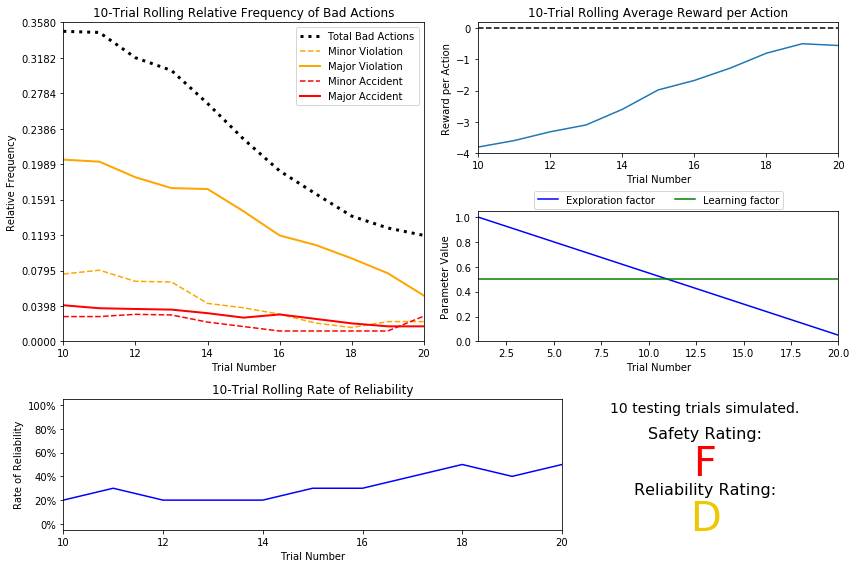

In [18]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

- The basic driving agent and default learning agent are similar in that both have sub-optimal performance and run for 20 training trials. Using default Q-Learning permits slightly better performance, though still far from what can be considered safe and reliable. In other regards, the two agents are notably different.


- The driving agent in the simulation with basic epsilon decay required 20 training trials before commencing testing. This makes sense with an epsilon-tolerance of 0.05, because epsilon was set at 1.0 for the first trial and decremented by 0.05 with each subsequent trial. The training log confirms that at trial number 20, epsilon reached 0.04999999999999993, after which the Smartcab began testing. Epsilon was not exactly 0.05 likely due to floating point imprecision in Python.


- The epsilon-decay function is working properly, indicated by the parameter panel showing epsilon starting at 1.0 and decaying linearly to 0.05 at trial number 20. The learning rate remained constant at its default value of 0.5 across the 20 training trials, also as intended.


- Unlike the basic driving agent, the default learning agent does demonstrate clear improvement in its performance over successive trials, both in safety and reliability. The 10-Trial Rolling Frequency of Bad Actions chart illustrates this for safety, with all categories of bad actions as well as their total declining as a function of trial number. Furthermore the trend in 10-Trial Rolling Rate of Reliability chart is also steadily moving upwards as a function of trial number, from 20% at trial number 10 to over 40% at trial number 20. As expected, 10-Trial Rolling Average Reward per Action also shows roughly linear improvement from trial to trial, although never quite reaching positive territory. Taken together, the above observations provide evidence that the Smartcab is indeed learning as intended, although not to the point of being considered truly safe and reliable in the environment.


- Safety and reliability ratings for the default learning agent, while superior to the basic driving agent, are still very poor. My hypothesis at this point is that the agent has not been given enough training trials to fully populate its Q-Table and thoroughly reinforce Q-Values for each state-action pair in the state space. Upon closer observation, the Q-Table contains 83 states - less than 96 states possible with the current build state configuration. Even for the states that it does contain, there are an abudance of actions with Q-Values of 0.00 - 171 in total -  suggesting that the learning agent hasn't yet explored these state-action pairs. By implementing a slower and perhaps non-linear epsilon-decay function, perhaps the Smartcab can overcome these issues with its Q-Table that are causing it to perform poorly come test time.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

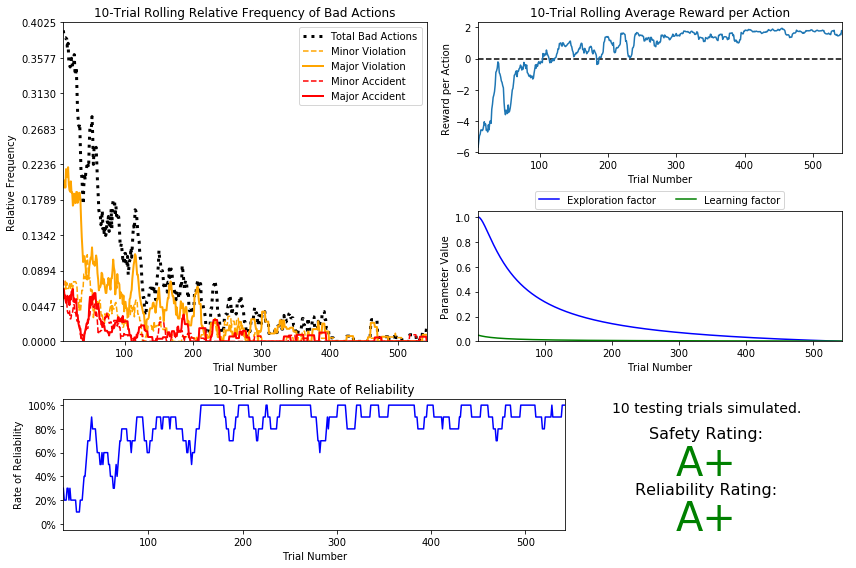

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

$$ \alpha = \frac{\alpha_{0}}{1 + (t * \beta)}, \textrm{for } 0 \leq \alpha_{0} \leq 1, \textrm{and } 0 < \beta < 1 \hspace{50px} \epsilon = \cos(\alpha * t), \textrm{for } 0 < \alpha < 1$$

- The improved Q-Learning Agent used an alpha decay function in addition to an epsilon decay function to encourage exploration. The alpha decay function used by the agent was taken from the reference at the bottom of this section.`*`
It can be seen that alpha $\alpha$ decays as a function of the trial number $t$ and a learning rate decay parameter $\beta$, and epsilon in turn decays as a function of alpha and the trial number, therefore the epsilon decay function is a composite function that contains the alpha decay function as one of its inputs.


- With these parameter decay functions, the agent ran 542 training trials before it began testing. This many trials resulted in the creation of a much more robust Q-Table than that of the default learning agent. Not only does the improved agent's table contain all 96 possible states, there are fewer 0.0 Q-Values than before - only 62 to be exact. Despite this, the cab was able to reach A+ ratings in safety and reliability, likely for reasons cited in part 5. The presence of these 0.0 values suggests that the agent has yet to fully explore the environment's state-action space. Further learning could be accomplished by slightly increasing the learning rate decay parameter, or slightly decreasing epsilon-tolerance. Note that with these decay functions, a higher learning rate decay parameter results in slower epsilon decay. Choosing an exploration function that decays more slowly could be useful as well.


- Initial alpha of 0.05 was used because I wanted the agent to learn slowly and deliberately from trial to trial. Choosing a larger alpha would cause new rewards from state-action pairs to more readily override their old Q-Values, which was not desired. Alpha was decayed at a decreasing rate so that the Q-Values could better converge to their expected values as the trial number increased. Without this decay, the Q-Values would have constantly varied in a small range around their expected values, but never come closer to convergence. Initial epsilon of 1.0 was used because it is crucial for the agent to explore all or most of its state space, especially in early phase of its training period. Epsilon decayed at a decreasing rate so that once the state space was mostly populated, the agent could spend the remainder of its training time further refining the Q-Values in the table - moving them closer and closer to their expected values. The parameter panel above shows that the agent mostly explored its state-action space from trial number 1 to 150 with epsilon between 0.20 and 1.0, and then spent the rest of the trials refining them with epsilon between 0.001 and 0.20. Epsilon-tolerance of 0.001 was used because I estimated that by the time epsilon reached this level, gains from refining Q-Values would have long since been exhausted. Average reward per action moved sideways after trial number 400, and frequencies of all bad actions converged near 0.0000 around trial number 500, supporting the case for the chosen parameters listed above.


- The above configuration resulted in a considerable performance increase as compared with the default Q-Learning agent from the previous section. This time, all violations in 10-Trial Rolling Relative Frequency of Bad Actions chart converged towards 0.0000 as the trial number increased, which ultimately resulted in an A+ Safety Rating. Furthermore, reliability trended upwards overall with the trial number, although its short-term trajectory was more noisy than that of the violation trends. It can be seen that the reliability metric converged to optimum earlier than the safety metrics. At testing time, the agent received an A+ Reliability Rating as well, proving that it learned to follow the waypoint after first considering the light and traffic conditions. The 10-Trial Rolling Average Reward per Action Chart is particularly informative as it appears that this metric reached its maximum around trial number 400, and was stable for the rest of training. This means that the Smartcab was generally operating at maximum performance and cannot improve much further with the current settings. All panels demonstrate that the driving agent has learned an appropriate policy needed for operating successfuly in its environment. Although I am satisfied with the maximum ratings in both safety and reliability that the cab reached in this simulation, these could not be maintained across various random seed initializations, specifically with regards to reliablity. To promote further consistency, learning rate decay $\beta$ could be increased to grant more training trials, or a more optimized decay function could be found and implemented.


`*` *Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (Kindle Location 10903). O'Reilly Media. Kindle Edition.*


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

##### Red Light Optimal Policy

- ('right', ('light': 'red', ... , 'left': 'forward')) ---> None
- All other ('right', ('light': 'red', ... ) ) states ---> Right


- All other ( ... , ('light': 'red', ... )) states ---> None

##### Green Light Optimal Policy

- ('left', ('light': 'green', 'oncoming': 'forward', ...)) ---> None
- ('left', ('light': 'green', 'oncoming': 'right', ...)) ---> None
- All other ( 'X' , ('light': 'green', ...)) states ---> 'X'


***** 

> - The policy that the agent learned is consistent with the optimum policy in all states in which the waypoint requests `right` and traffic from the `left` wants to move `forward.` For all other states where `light` is `red`, the agent's policy agrees that `None` is the correct action. For most states where `light` is `green`, the highest Q-Value corresponds with the `waypoint` for each state. Exceptions are explained below.


> - There are some states in which `waypoint` is `right`, `light` is red, and `left` is not `forward`, but the agent's policy has `None` as its highest Q-Value. This is because choosing `None` here is not necessarily an illegal action, and in fact grants the agent a positive reward. In the real world, if you intended to turn right at a light and didn't want to turn on red, despite there being no thru-traffic, then that would be a legal action, however you might anger impatient drivers behind you who want to turn right as well. In these cases, `right` is positive as well, it just so happens that `None` has a higher value, likely due to the agent randomly selecting it more often when epsilon is high. Changing the random seed would result in changes to this observation.


> - An interesting observation found in the Q-Table is that in states in which `waypoint` is `left`, `light` is `green`, and `oncoming` is `forward` or `right`, choosing `forward` or `right` grants a higher Q-Value than choosing `None`. In this aspect, output from the environment  contradicts reality in a way. In real life, if you intended to turn left at a green light and face oncoming traffic, then you would continue waiting until the light turned red. This is the equivalent of choosing `None`. However, `None` is not the best action for the agent to take in this environment because idling at a green light always results in a negative reward. It's better for the agent choose `forward` or `right`, even if it means getting further away from the destination. The specific action the agent takes in this situation - `forward` or `right` - depends on which action got a higher Q-Value during the training phase of a simulation. The highest value is due to random chance.

##### Example 1

`('forward', (0, 1, 0))
 -- forward : -1.88
 -- None : 1.53
 -- right : 0.06
 -- left : -6.90`
 
 - `None` is the correct action because the light is red and the waypoint is not directing the cab to turn right. All other state information can be ignored.
 
##### Example 2

`('left', (1, 1, 0))
 -- forward : 0.03
 -- None : -0.17
 -- right : 0.42
 -- left : -1.59`
 
- `right` is the correct action because following the waypoint left would cause the cab to cause an accident with oncoming traffic that intends to move forward. Choosing `None` is not favorable because this typically involves the idling at the green light for several steps, which accumulates negative reward as the route deadline nears. In such situations, it's usually more effective if the cab moves to the next intersection and reroutes itself to its destination from there. Whether the cab chooses `forward` or `right` is random in this situation. It depends on which state-action pair the cab explored more during training.

##### Example 3

`('right', (0, 2, 0))
 -- forward : -2.93
 -- None : 0.24
 -- right : 1.16
 -- left : -2.84`
 
- `right` is the correct action because the light is red, and there is no traffic coming from the left. The intention of oncoming traffic is ignored because it is assumed to be stopped at its own red light.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

- `gamma` would be important to include in the implementation if the Smartcab were to receive rewards only at the end of a simulation. Many reinforcement learning problems have this characteristic, such as Go and Chess. In these problems, feedback from the environment only comes at the end of a simulation, and therefore the agent faces the "credit assignment problem" in which it has to pinpoint how much each state-action pair contributed to the final result. Including future rewards and the discount factor `gamma` is necessary in order to backpropagate the ultimate rewards through the chains of events that the agent experiences, helping to solve the credit assignment problem. 



- The Smartcab environment on the other hand faces no such credit assignment problem, because the cab receives immediate feedback when it experiences a state-action pair. Every time the Smartcab takes an action in a state, it receives a positive or negative reward, depending on whether or not the action it took was legal or illegal and also whether or not it led it closer to the destination. There is no ultimate reward per se for reaching the destination in the alloted time. However, the size of immediate rewards for legal actions is inversely related to the amount time remaining in a trial, all else held equal. In this way, future information is reflected in the relative size of immediate rewards. 


- Another aspect of the environment that complicates using future rewards is the fact that `deadline` changes from trial to trial, depending on where the destination is placed at trial initialization. For example in some trials the cab is given 20 steps to reach its goal while in others it is given 35 steps. Considering this aspect, it is important that the cab learn to behave optimally **at each step** and not for any particular trial as a whole. To demonstrate why optimizing for a certain trial would be an issue, consider a cab using future rewards in its training process in trials where it is given 35 steps to reach its destination. Optimizing for this 35 step trial would cause it to consistently perform unreliably in trials where is only given 20 steps.


- Building on this, it doesn't make sense to include future rewards in Smartcab's Q-Learning implementation when the cabs state progression process includes a major stochastic element, specifically with regards to the intentions of surrounding traffic. At each step, the cab must first sense the current waypoint and the state of surrounding traffic before deciding on an action. During this sensing process, the environment provides no information to the cab that would enable it to know what state it will move to next after it makes a decision. All that can be learned is that following the waypoint brings the destination one step closer. Without knowing the traffic situation at future states, the cab cannot know what future actions it will need to take, and ultimately what future rewards it will receive. This further supports optimizing learning to drive on **step-by-step** basis, and not at the trial level.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.